### Imports

In [1]:
import csv
import re
import glob
import datetime
from pathlib import Path
import pandas
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append(str(Path.cwd().parents[0]))
from functions import *

### Set Save File Name

In [2]:
save_path = Path.cwd() / "Plots"
if not save_path.exists():
    save_path.mkdir()

### Get the Data Paths

In [22]:
# Get the lists of file paths
data_files = getFilePaths(Path.cwd(), "Select Files to Plot")

In [23]:
raw_dfs = readCSVFiles(data_files)
# remove the first two columns
raw_dfs = [df.iloc[:, 2:] for df in raw_dfs]
# convert all headers to srting
raw_dfs = [df.astype(str) for df in raw_dfs]
raw_dfs[0].head()

,des_spring_k,des_spring_k.1,des_zeta,des_zeta.1,max_height,max_height.1,rollout/ep_len_mean,rollout/ep_len_mean.1,rollout/ep_rew_mean,rollout/ep_rew_mean.1,...,rollout/ep_rew_mean.4,rollout/ep_rew_mean.1.5,time/fps.4,time/fps.1.5,train/actor_loss.4,train/actor_loss.1.5,train/critic_loss.4,train/critic_loss.1.5,train/learning_rate.4,train/learning_rate.1.5
0,value,wall_time,value,wall_time,value,wall_time,value,wall_time,value,wall_time,...,value,wall_time,value,wall_time,value,wall_time,value,wall_time,value,wall_time
1,5059.103515625,1647115846.2262466,0.009545454755425453,1647115846.226309,0.007339934352785349,1647115846.2263372,40.75,1647115846.22636,-0.05215125158429146,1647115846.2263813,...,-0.09542974829673767,1647115846.2587893,4992.0,1647115846.2588127,nan,nan,nan,nan,nan,nan
2,6185.3662109375,1647115846.2460718,0.008187011815607548,1647115846.2461295,0.00033772236201912165,1647115846.2461572,32.25,1647115846.2461796,-0.048402998596429825,1647115846.2462006,...,-0.06201675161719322,1647115846.2819135,4899.0,1647115846.2819371,nan,nan,nan,nan,nan,nan
3,6352.087890625,1647115846.2862465,0.0007680573035031557,1647115846.2863166,0.008206216618418694,1647115846.2863739,35.08333206176758,1647115846.2864292,-0.056353166699409485,1647115846.2864819,...,-0.06499966979026794,1647115846.3130414,4842.0,1647115846.3130662,nan,nan,nan,nan,nan,nan
4,7570.34326171875,1647115846.3171701,0.005445222835987806,1647115846.3172352,0.0009546098881401122,1647115846.317295,34.25,1647115846.3173523,-0.055998437106609344,1647115846.317386,...,-0.06565137207508087,1647115846.3384006,4766.0,1647115846.3384256,nan,nan,nan,nan,nan,nan


### Clean Data Frames

In [24]:
# Append the first row of the dataframe to the header
plot_dfs = []
for df in raw_dfs:
    df.columns = df.iloc[0] + "_" + df.columns  
    df = df.iloc[1:]
    plot_dfs.append(df)
    
plot_dfs[0].head()

,value_des_spring_k,wall_time_des_spring_k.1,value_des_zeta,wall_time_des_zeta.1,value_max_height,wall_time_max_height.1,value_rollout/ep_len_mean,wall_time_rollout/ep_len_mean.1,value_rollout/ep_rew_mean,wall_time_rollout/ep_rew_mean.1,...,value_rollout/ep_rew_mean.4,wall_time_rollout/ep_rew_mean.1.5,value_time/fps.4,wall_time_time/fps.1.5,value_train/actor_loss.4,wall_time_train/actor_loss.1.5,value_train/critic_loss.4,wall_time_train/critic_loss.1.5,value_train/learning_rate.4,wall_time_train/learning_rate.1.5
1,5059.103515625,1647115846.2262466,0.009545454755425453,1647115846.226309,0.007339934352785349,1647115846.2263372,40.75,1647115846.22636,-0.05215125158429146,1647115846.2263813,...,-0.09542974829673767,1647115846.2587893,4992.0,1647115846.2588127,nan,nan,nan,nan,nan,nan
2,6185.3662109375,1647115846.2460718,0.008187011815607548,1647115846.2461295,0.00033772236201912165,1647115846.2461572,32.25,1647115846.2461796,-0.048402998596429825,1647115846.2462006,...,-0.06201675161719322,1647115846.2819135,4899.0,1647115846.2819371,nan,nan,nan,nan,nan,nan
3,6352.087890625,1647115846.2862465,0.0007680573035031557,1647115846.2863166,0.008206216618418694,1647115846.2863739,35.08333206176758,1647115846.2864292,-0.056353166699409485,1647115846.2864819,...,-0.06499966979026794,1647115846.3130414,4842.0,1647115846.3130662,nan,nan,nan,nan,nan,nan
4,7570.34326171875,1647115846.3171701,0.005445222835987806,1647115846.3172352,0.0009546098881401122,1647115846.317295,34.25,1647115846.3173523,-0.055998437106609344,1647115846.317386,...,-0.06565137207508087,1647115846.3384006,4766.0,1647115846.3384256,nan,nan,nan,nan,nan,nan
5,4362.53271484375,1647115846.3534968,0.003783158026635647,1647115846.3535726,0.009927649982273579,1647115846.3536167,35.0,1647115846.3536441,-0.04149580001831055,1647115846.353667,...,-0.06571085005998611,1647115846.3610618,4690.0,1647115846.361089,nan,nan,nan,nan,nan,nan


In [42]:
plot_type = "height"
# Get the series from the column names
if plot_type == "rew":
    data_values = ["value_rollout/ep_rew_mean"]
elif plot_type == "spring":
    data_values = ["value_des_spring_k"]
elif plot_type == "zeta":
    data_values = ["value_des_zeta"]
elif plot_type == "height":
    data_values = ["value_max_height"]

final_dfs = []
for df in plot_dfs:
    drop_names = []
    for column in df:
        if not any(data_values in column for data_values in data_values):
            drop_names.append(str(column))
    df = df.drop(drop_names, axis=1)
    # convert to float
    df = df.astype(float)
    final_dfs.append(df)

final_dfs[0].head()

,value_max_height,value_max_height.1.1,value_max_height.2,value_max_height.3,value_max_height.4
1,0.007340,0.001604,0.001093,0.010188,0.002968
2,0.000338,0.000775,0.004454,0.002451,0.000924
3,0.008206,0.001228,0.002083,0.001525,0.000702
4,0.000955,0.004532,0.002491,0.000412,0.001078
5,0.009928,0.002515,0.001304,0.000321,0.000779


### Save the Final Values to File

In [82]:
# loop through the dataframes and save the final designs to a csv file
for df in range(len(final_dfs)):
    # create a list of the last non nan values for each column
    values = [[], []]
    ii = 0
    for column in final_dfs[df]:
        index = final_dfs[df][column].last_valid_index()
        if ii % 2 == 0:
            values[0].append(final_dfs[df][column][index])
        else:
            values[1].append(final_dfs[df][column][index])
        ii += 1
    
    # Save the values to csv files
    save_vals = np.array(values).transpose()
    header = "SpringK, Zeta"
    save_path = data_files[df].parents[2] / "models"
    print(save_path)
    np.savetxt(save_path / f"final_designs{df}.csv", save_vals, delimiter=",", header=header, comments="")

C:\Users\andre\Documents\GitHub\CRAWLAB-Student-Code---2020\Andrew Albright\Code\Pogo Stick\Concurrent Design\training_data\2022_03_04_1000\ctr_Effic_Stutter\models
C:\Users\andre\Documents\GitHub\CRAWLAB-Student-Code---2020\Andrew Albright\Code\Pogo Stick\Concurrent Design\training_data\2022_03_04_1000\ctr_Heigh_Stutter\models
C:\Users\andre\Documents\GitHub\CRAWLAB-Student-Code---2020\Andrew Albright\Code\Pogo Stick\Concurrent Design\training_data\2022_03_04_3000\ctr_Effic_Stutter\models
C:\Users\andre\Documents\GitHub\CRAWLAB-Student-Code---2020\Andrew Albright\Code\Pogo Stick\Concurrent Design\training_data\2022_03_04_3000\ctr_Heigh_Stutter\models
C:\Users\andre\Documents\GitHub\CRAWLAB-Student-Code---2020\Andrew Albright\Code\Pogo Stick\Concurrent Design\training_data\2022_03_04_5000\ctr_Effic_Stutter\models
C:\Users\andre\Documents\GitHub\CRAWLAB-Student-Code---2020\Andrew Albright\Code\Pogo Stick\Concurrent Design\training_data\2022_03_04_5000\ctr_Heigh_Stutter\models


### Plot Average/STD Timeseries

In [43]:
X_1_MEAN = final_dfs[0].index
Y_1_MEAN, Y_1_STD = dfAverageStd(final_dfs[0])

X_2_MEAN = final_dfs[1].index
Y_2_MEAN, Y_2_STD = dfAverageStd(final_dfs[1])

X_3_MEAN = final_dfs[2].index
Y_3_MEAN, Y_3_STD = dfAverageStd(final_dfs[2])

x_1_len, x_2_len, x_3_len = len(X_1_MEAN), len(X_2_MEAN), len(X_3_MEAN)
# find the smallest length
min_len = min(x_1_len, x_2_len, x_3_len)
max_len = max(x_1_len, x_2_len, x_3_len)
print(f"Len X_1: {len(X_1_MEAN)}")
print(f"Len X_2: {len(X_2_MEAN)}")
print(f"Len X_3: {len(X_3_MEAN)}")
print(f"Min Len: {min_len}")

Len X_1: 4114
Len X_2: 4870
Len X_3: 4817
Min Len: 4114


### Plot Dual Y Axis

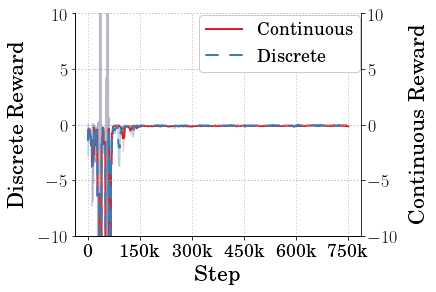

In [16]:
fig = plt.figure(figsize=(6,4))
ax1 = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax1.get_ymajorticklabels(),fontsize=18)
plt.setp(ax1.get_xmajorticklabels(),fontsize=18)

# Remove the top and right border, they are not needed
ax1.spines['right'].set_visible(True)
ax1.spines['right'].set_color("black")
# ax1.spines['top'].set_color('none')

# Define the positions of the axes tick marks
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

# Manually set the x-axis limits, if necessary
# plt.xlim(0,5)

# Turn on the plot grid and set appropriate linestyle and color
ax1.grid(True, linestyle=':', color='0.75')
ax1.set_axisbelow(True)

# Define the X and Y1 axis labels
ax1.set_xlabel('Step', fontsize=22, weight='bold', labelpad=5)
ax1.set_ylabel('Discrete Reward', fontsize=22, weight='bold', labelpad=10)

# Plots gain used on input to tracking of Surge
ax1.plot(X_1_MEAN, Y_1_MEAN, linewidth=2, linestyle='-', label="Continuous")
ax1.fill_between(X_1_MEAN, Y_1_MEAN-(Y_1_STD/2), Y_1_MEAN+(Y_1_STD)/2, alpha=0.25)
# ax1.plot(x, y1, linewidth=2, linestyle='-', label=r'$y_1$', )

# Manually set the y1-axes limits, if necessary
ax1.set_ylim(bottom=-10, top=10)

# Set x-axis tick marks
label = ["0", "150k", "300k", "450k", "600k", "750k"]
ax1.set_xticks(np.linspace(0, x_ax_len, 6))
ax1.set_xticklabels(label, fontsize=18, weight='bold')

# Set up the 2nd Y-axis, using the same x-axis as the first
ax2 = ax1.twinx()

# Remove the top border, it's not needed
# ax2.spines['top'].set_color('none')

# Turn on the plot grid and set appropriate linestyle and color
ax2.grid(True, linestyle=':', color='0.75')
ax2.set_axisbelow(True) 

# Change the y2 axis units font
plt.setp(ax2.get_ymajorticklabels(), fontsize=18)

# Define the Y2 axis labels
ax2.set_ylabel('Continuous Reward', fontsize=22, weight='bold', labelpad=10)

ax2.plot(X_2_MEAN, Y_2_MEAN, linewidth=2, linestyle='--', color = '#377eb8', label="Discrete")
ax2.fill_between(X_2_MEAN, Y_2_MEAN-(Y_2_STD/2), Y_2_MEAN+(Y_2_STD)/2, color = '#377eb8', alpha=0.25)
# ax2.plot(x, y2, linewidth=2, linestyle='--', color = '#377eb8', label=r'$y_2$')

# Manually set the y2-axes limits, if necessary
ax2.set_ylim(bottom=-10, top=10)

# Create the legend, then fix the fontsize
# ask matplotlib for the plotted objects and their labels
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
leg = ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# fill = "stutter"
# filename = f'RewVsTime{fill}.svg'
# path = save_path / filename
# plt.savefig(path, transparent=True)
# filename = f'RewVsTime{fill}.png'
# path = save_path / filename
# plt.savefig(path, transparent=True)
plt.show()

### Plot Learning Data

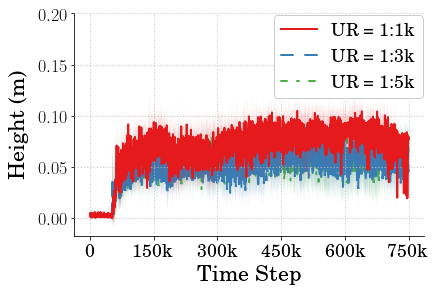

In [46]:
jump_type = "hei"
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
# fig = plt.figure(figsize=(9,6))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Time Step', fontsize=22, weight='bold', labelpad=5)

if plot_type == "rew":
    plt.ylabel(r'Reward', fontsize=22, weight='bold', labelpad=10)
elif plot_type == "spring":
    plt.ylabel(r'Spring Constant $\alpha$', fontsize=22, weight='bold', labelpad=10)
elif plot_type == "zeta":
    plt.ylabel(r'Damping Ratio $\zeta$', fontsize=22, weight='bold', labelpad=10)
elif plot_type == "height":
    plt.ylabel(r"Height (m)", fontsize=22, weight='bold', labelpad=10)


plt.plot(X_1_MEAN[:min_len], Y_1_MEAN[:min_len], linewidth=2, linestyle='-', label="UR = 1:1k", zorder=3)
plt.fill_between(X_1_MEAN[:min_len], Y_1_MEAN[:min_len]-Y_1_STD[:min_len], Y_1_MEAN[:min_len]+Y_1_STD[:min_len], alpha=0.2, zorder=3)
plt.plot(X_2_MEAN[:min_len], Y_2_MEAN[:min_len], linewidth=2, linestyle='--', label="UR = 1:3k", zorder=2)
plt.fill_between(X_2_MEAN[:min_len], Y_2_MEAN[:min_len]-Y_2_STD[:min_len], Y_2_MEAN[:min_len]+Y_2_STD[:min_len], alpha=0.2, zorder=2)
plt.plot(X_3_MEAN[:min_len], Y_3_MEAN[:min_len], linewidth=2, linestyle='-.', label="UR = 1:5k", zorder=1)
plt.fill_between(X_3_MEAN[:min_len], Y_3_MEAN[:min_len]-Y_3_STD[:min_len], Y_3_MEAN[:min_len]+Y_3_STD[:min_len], alpha=0.2, zorder=1)

        
# uncomment below and set limits if needed
# plt.xlim(0,1.25)
# plt.ylim(bottom=-0.005, top=0.02)
# plt.ylim(bottom=-5, top=5)
plt.ylim(bottom=None, top=0.2)
# plt.ylim(bottom=0, top=0.015)

# Set x-axis tick marks
label = ["0", "150k", "300k", "450k", "600k", "750k"]
ax.set_xticks(np.linspace(0, min_len, 6))
ax.set_xticklabels(label, fontsize=18, weight='bold')

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = save_path / f'avg_{jump_type}_{plot_type}_.svg'
plt.savefig(filename, transparent=True)
filename = save_path / f'avg_{jump_type}_{plot_type}_.png'
plt.savefig(filename, transparent=True)
plt.show()